,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0



            count
Red Wins:    3470
Blue Wins:   1591

Manually calculated binomial test z score = 26.412445349008575
P-value = 0.0
The z-score of the observed proportion was signficantly different to that predicted by the null hypothesis (of equiprobability).



<AxesSubplot:>

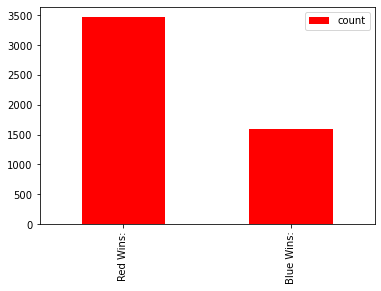

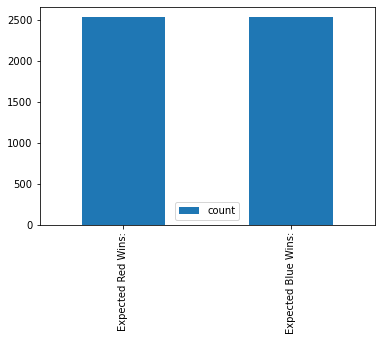

In [2]:
import pandas as pd
import math
import scipy.stats
import matplotlib.pyplot as plt

# this dataset  contains the results of MMA fights in the UFC. Fighters are assigned to a coloured corner (red or blue). 
# I wanted to investigate whether a higher proportion of victories was associated with one corner colour.

dframe = pd.read_csv('data.csv')

display(dframe.head())
print()

count_red_win = len(dframe[dframe['Winner'] == 'Red'])
count_blue_win = len(dframe[dframe['Winner'] == 'Blue'])

dframe2 = pd.DataFrame([count_red_win, count_blue_win], columns = ['count'])
dframe2.index = ['Red Wins:', 'Blue Wins:']

print(dframe2)
print()

# binomial test parameters. H0 = red and blue wins are equally likely.

p = 0.5
q = 1 - p
n = count_red_win+count_blue_win

np = n*p
SE = math.sqrt(p*q/n)

obs = dframe2['count'][0]

z = (obs/n - np/n)/SE
p_value = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

print('Manually calculated binomial test z score =', z)
print('P-value =', p_value )

# calculating a p-value with scipy.stats

result = scipy.stats.binom_test(obs,n)


if result <= 0.05 and p_value <= 0.05:
    print('The z-score of the observed proportion was signficantly different to that predicted by the null hypothesis (of equiprobability).')
else:
        print('The z-score of the observed proportion was NOT signficantly different to that predicted by the null hypothesis (of equiprobability).')
# plotting the expected and observed frequencies
print()
dframe3 = pd.DataFrame([np,np], columns = ['count'])
dframe3.index = ['Expected Red Wins:', 'Expected Blue Wins:']

dframe2.plot.bar(color = 'red')
dframe3.plot.bar()

